In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# Загрузим датасет и разобьем его на train и test

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормализуем датасет
train_images, test_images = train_images / 255.0, test_images / 255.0

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

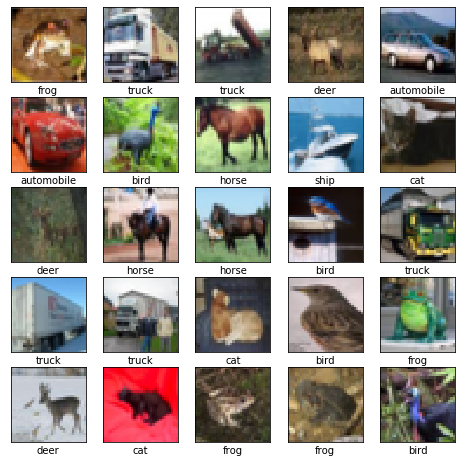

In [11]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [12]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same', input_shape = train_images.shape[-3:]),
    layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(.25),
    layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(.25),
    layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(.25),
            
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.25),
    layers.Dense(10)
])


In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(train_images)

history = model.fit(datagen.flow(train_images, train_labels, batch_size=1200),
                              steps_per_epoch = train_images.shape[0] / 1200,
                              epochs=40,
                              validation_data=(test_images, test_labels))

  ...
    to  
  ['...']
Train for 41.666666666666664 steps, validate on 10000 samples
Epoch 1/40
42/41 [==============================] - 22s 524ms/step - loss: 0.4362 - accuracy: 0.8488 - val_loss: 0.4697 - val_accuracy: 0.8480
Epoch 2/40
42/41 [==============================] - 21s 488ms/step - loss: 0.4212 - accuracy: 0.8554 - val_loss: 0.5050 - val_accuracy: 0.8386
Epoch 3/40
42/41 [==============================] - 21s 491ms/step - loss: 0.4170 - accuracy: 0.8550 - val_loss: 0.4554 - val_accuracy: 0.8550
Epoch 4/40
42/41 [==============================] - 21s 492ms/step - loss: 0.4111 - accuracy: 0.8570 - val_loss: 0.4924 - val_accuracy: 0.8438
Epoch 5/40
42/41 [==============================] - 21s 495ms/step - loss: 0.4061 - accuracy: 0.8583 - val_loss: 0.5014 - val_accuracy: 0.8433
Epoch 6/40
42/41 [==============================] - 21s 491ms/step - loss: 0.4051 - accuracy: 0.8572 - val_loss: 0.4934 - val_accuracy: 0.8450
Epoch 7/40
42/41 [==============================] - 20s

10000/10000 - 1s - loss: 0.5464 - accuracy: 0.8285


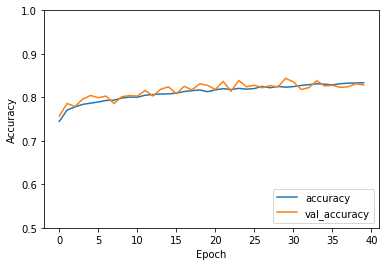

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)